# Задачи к Лекции 2

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [3]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [4]:
df.shape

(30181, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
ID        30181 non-null int64
Name      30181 non-null object
Sex       30181 non-null object
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null object
NOC       30181 non-null object
Games     30181 non-null object
Year      30181 non-null int64
Season    30181 non-null object
City      30181 non-null object
Sport     30181 non-null object
Event     30181 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [7]:
# Your code here
#import pandas as pd
pd.crosstab(df['Sex'], df['Medal'], margins=True)


Medal,Bronze,Gold,Silver,All
Sex,,,,
F,3475,3437,3438,10350
M,6673,6730,6428,19831
All,10148,10167,9866,30181


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [54]:
# Your code here                                                           / old practice. it works, but it is old / 
new_ff=pd.crosstab(df['Team'], df['Medal']=='Gold', margins=True)
new_ff.to_csv('../data/ml_out/gold_medal.csv')
#new_ff


In [53]:
new_fff = pd.read_csv('../data/ml_out/gold_medal.csv')
new_fff
new_fff.sort_values(by='True', ascending=False).head(3) 

,Team,False,True,All
263,All,20014,10167,30181
243,United States,2198,2075,4273
205,Soviet Union,1242,961,2203


In [59]:
#beginning of new practice

#sort = new_ff.sort_values('True',ascending=False)  эта строка почему-то выдает ошибку, и говорит что проблема в 'True'
# у меня получилось все отсторитровать, но пришлось запись и считать файл (это выше)

#можно попробовать другим способом, чтобы без считывания файла
#придется делать переименование столбца  'True'
new_ff.rename(index=str, columns={"True": "Gold"}) #переименования не происходит, разберусь с этим позже
#new_ff.sort_values(by='Gold',ascending=False).head(3)  # какая-то ошибка идет на этой строчке

Medal,False,True,All
Team,,,
Afghanistan,2,0,2
Algeria,10,5,15
Amateur Athletic Association,0,2,2
Aphrodite,3,0,3
Argentina,144,72,216
Argonaut Rowing Club,1,0,1
Armenia,13,2,15
Australasia,4,0,4
Australia,883,313,1196


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [13]:
# Your code here
sex_sport=pd.crosstab(df['Sex'], df['Sport'], margins=True)

sex_sport.to_csv('../data/ml_out/sex_sport_2_3.csv')
sex_sport

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,180,100,0,1239,73,0,390,35,147,24,...,72,84,14,15,0,469,191,105,68,10350
M,174,106,2,2409,81,333,610,33,241,259,...,72,89,15,15,8,489,573,427,899,19831
All,354,206,2,3648,154,333,1000,68,388,283,...,144,173,29,30,8,958,764,532,967,30181


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [14]:
# Your code here
#df[['age', 'weight']]

lec2_ex4=df[['Age','Sport','Sex']]
#lec2_ex4


In [15]:
#lec.groupby(['Sex'])['Age', 'weight'].agg([
 #   np.mean, np.std, np.min, np.max,
#])

lec2_4=lec2_ex4[lec2_ex4['Sport'].apply(lambda h: h == 'Ice Hockey')]
#lec2_4

In [16]:
lec2_4_new=lec2_4[lec2_4['Sex'].apply(lambda h: h == 'F')]
#lec2_4_new

lec2_4_new.pivot_table(['Age'],['Sex', 'Sport'], aggfunc=[np.mean, np.std])

,,mean,std
,,Age,Age
Sex,Sport,,
F,Ice Hockey,24.42,4.360464


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [17]:
lec2_5=df[df['Medal'].apply(lambda h: h == 'Bronze')]#[df['Sex'].apply(lambda s:s=='F')]]
lec2_5=lec2_5[lec2_5['Sex'].apply(lambda s: s=='F' )]
lec2_ex5=lec2_5[['Medal','Team','Sex']]

lec2_ex5=pd.crosstab(lec2_ex5['Team'], df['Medal']=='Bronze', margins=True)
lec2_ex5.to_csv('../data/ml_out/lec2_ex5.csv')
#lec2_ex5


In [23]:
#lec = pd.read_csv('../data/ml_out/gold_medal.csv')
#new_fff
lec2_ex5.sort_values(by='All', ascending=False).head(3)

Medal,True,All
Team,,
All,3475,3475
United States,360,360
Germany,226,226


In [138]:
# Your code here

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

In [34]:
#lec_2_6_b=df[df['Team'].apply(lambda h: h == 'Russia' or h=='East Germany' or h=='Unified Team')]
#lec2_6=df[['Team','Medal']] doesn't fit Russia Unified team east germany
                                     
lec2_6=pd.crosstab(df['Team'], df['Medal'], margins=True) # should work better .
lec2_6_b=lec2_6.sort_values(by='All', ascending=False).head(4)
lec2_6_b 



Medal,Bronze,Gold,Silver,All
Team,,,,
All,10148,10167,9866,30181
United States,938,2075,1260,4273
Soviet Union,613,961,629,2203
Germany,540,508,470,1518


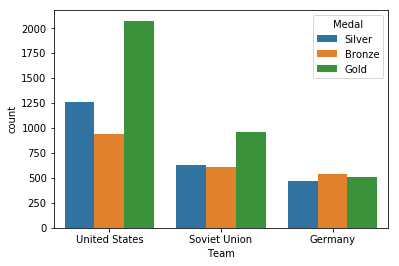

In [37]:

#lec_2_6_b[['Medal']].hist(figsize=(10, 4))
lec2_6_bb=df[df['Team'].apply(lambda h: h == 'United States' or h=='Soviet Union' or h=='Germany')]
sns.countplot(x='Team', hue='Medal', data=lec2_6_bb)

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

/home/aryuna/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


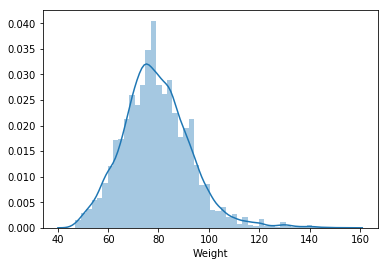

In [38]:
# Your code here
lec2_7=df[df['Sex'].apply(lambda h: h == 'M')]
lec2_7=lec2_7[lec2_7['Medal'].apply(lambda l: l=='Silver')]
#lec2_7
sns.distplot(lec2_7['Weight'])

**8. Постройте boxplot для возраста участника в зависимости от медали**

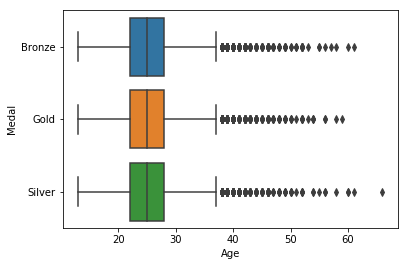

In [39]:
# Your code here
lec2_8=pd.crosstab(df['Age'], df['Medal'], margins=True)
lec2_8
#sns.boxplot(y="Age", x='Medal', data=lec2_8, orient="h")
#sns.boxplot(y="Medal", x="Age", data=lec2_8, orient="h")
sns.boxplot(y="Medal", x='Age', data=df, orient="h")

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

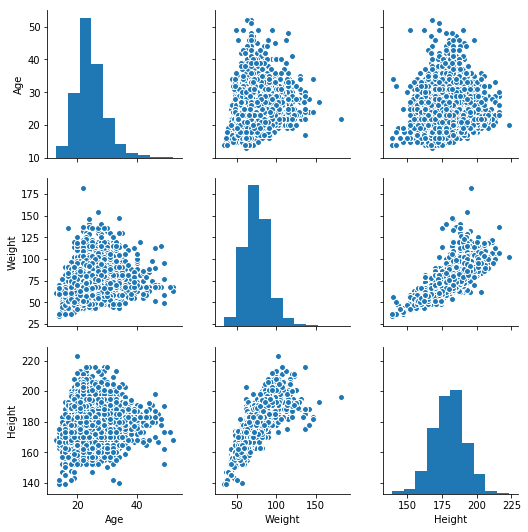

In [40]:
# Your code here
#data=df[df['gender'] == 1]
lec2_9=df[df['Team']=='United States']
sns.pairplot(lec2_9[['Age', 'Weight','Height']])